## 🔮 Deep Learning Basics

$\text{Reminder:}$

- We have a dataset $(x,y)$ representing the true target function $f_t(x)$ (i.e., $y=f_t(x)$)

- Any machine learning model is equivalent to some hypothesis set represented by mathematical function $f(x;θ)$

- The objective of training is to learn the optimal value of the parameters $θ$ (i.e., find $θ^*$ such that $f_{θ^*}(x)≈f_t(x)$)

- Now use $f_{θ^*}(x)$ on real examples; it's a great approximate of $f_t(x)$

In deep learning, and some machine learning algorithms (which we'll see here), this explictly takes place as follows:

1. Directly define the form of $f(x;θ)$

2. Define (or choose) a loss function $J_m$ that for any $θ$ measures the discripancy between $ŷ_m = f(x_m;θ)$ and $y_m$

  - That is, it measures the discripancy between $f_t(x)$ and our model $f(x_m;θ)$

  - Given a training set we can compute $J(θ)=Σ_{m=1}^{M}J_m(y_m, ŷ_m)$ to get the total loss over it

3. Choose an optimizer and use it to solve the optimization problem $\min_θ J(θ)$

- This is the training step

- If minimized properly we get the best $θ$ that makes $f(x;θ) ≈ f_t(x)$ and our model should be quite performant!



### 📈 Linear Regression

1. Define the hypothesis function as an n-dimensional hyperplane
$$ŷ = f(x;θ) = w_o + w_1x_1+w_2x_2+...+w_nx_n = w^t u$$

2. Define the loss function as the squared loss (absolute loss also possible)
$$J(θ)=Σ_{m=1}^{M} (ŷ_m -y_m)^2 = Σ_{m=1}^{M} (w^t u_m -y_m)^2$$

3. Choose the most optimal optimizer in mathematics:

$$\text{solve} \quad \frac{\partial J}{\partial \theta} = 0$$

As in the lecture, solving:
$$ \frac{\partial J}{\partial w} = \frac{\partial}{\partial w} (Σ_{m=1}^{M} (w^t u_m -y_m)^2)  = 0$$

Leads to

$$w_{(1+n,1)} = (U^T U)^{-1} U^T Y$$

where $U$ is a $(m, 1+n)$ matrix of observations and $Y$ is a $(m,1)$ vector of corresponding labels.

In [1]:
# Let's try that out!
import numpy as np

class LinearRegression:
    def __init__(self):
        self.w:np.ndarray = None            # n+1 dimensional vector
    
    def fit(self, x_data, y_data):
        # yep, training which finds the weights is just a formula here :)
        u_data = np.c_[np.ones(len(x_data)), x_data]                    # (m,n) => (m,1+n)
        U, Y = u_data, y_data
        self.w = np.linalg.inv(U.T @ U) @ (U.T @ Y)
    
    def predict(self, x_val):
        # apply y = wo + w1*x1 + w2*x2 + ... + w_n*x_n
        u_val = np.c_[np.ones(len(x_val)), x_val]
        return u_val @ self.w                           # (m,n+1) * (n+1, 1)= (m,1) y_pred[i] = w^T * u_val[i]

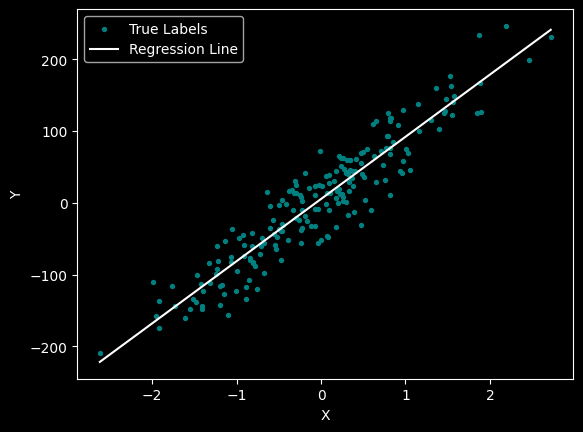

In [11]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate a random regression data with one feature
x_data, y_data = make_regression(n_samples=200, n_features=1, bias=1, noise=30, random_state=42)
lr = LinearRegression()
lr.fit(x_data, y_data)
y_pred = lr.predict(x_data)



# Plotting
plt.style.use('dark_background')
plt.scatter(x_data, y_data, color='teal', label='True Labels', s=8)

# Define the regression line
x_range = np.linspace(min(x_data), max(x_data), 100)
wo, w1 = lr.w
y_regression = wo + w1 * x_range

# Plot the regression line
plt.plot(x_range, y_regression, color='white', label='Regression Line')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 📊 Logistic Regression

- Actually a classifier and is probabilistic like Bayes classifier

- But has this name for historical reasons (e.g., probabilities are continuous)

1. **Define the hypothesis function** as the logistic function applied to the linear combination of input features and parameters:
   $$ ŷ = f(x; \theta) = \sigma(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n) = \sigma(w^T u) $$
   
   - Here, $ \sigma(z) $ is the logistic function, given by $ \sigma(z) = \frac{1}{1 + e^{-z}} $.
   
   - It's just a function that gives the model the ability to output probabilities (e.g., ranges from $0$ to $1$)

   - Classifier is still linear (solving $\sigma(w^T u)=0.5$ yields $w^T u=0$)

2. **Define the loss function** as the cross-entropy loss function:
   $$J(\theta) = -\frac{1}{M} \sum_{m=1}^{M} \left[ y_m \log(ŷ_m) + (1 - y_m) \log(1 - ŷ_m) \right] $$

  - Least Squares wouldn't work because difference between label values should be meaningless

  - Suppose $y_m=0$ then $J_m$ is $-\log(1 - ŷ_m)$ which is minimum if $ŷ_m=0$
  - Suppose $y_m=1$ then $J_m$ is $-\log(ŷ_m)$ which is minimum if $ŷ_m=1$

3. Let's go for:

$$\text{solve} \quad \frac{\partial J}{\partial w} = 0$$

Yields something along the lines of
$$Σ_{m=1}^{M}(\frac{-y_mu_m}{1+e^{-y_m*w^t*u_m}})=0$$

Good luck solving for $w$ (not possible). Thankfully, numerical optimization exists. 

<img src="https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png" width=400>

The simplest algorithm for that is gradient descent which minimizes an arbitrary function $g$ w.r.t $θ$ by applying the following until convergence after choosing the learning rate $α$ and initializing $w$:

$$ \theta_{t+1} = \theta_t - \alpha \frac{\partial g}{\partial θ} $$

- 👀 **Important Observation:** Requires only being able to compute $\frac{\partial g}{\partial θ}$ (no need to equate it to zero)

We were able to compute $\frac{\partial J}{\partial w}$ and hence, we can train the logistic regression model by repeatedly applying:

$$ w_{t+1} = w_t - \alpha \frac{\partial J}{\partial w} $$


In [92]:
import torch
import numpy as np

# 1. Define hypothesis f(x;θ)
def σ(z):
    return 1 / (1 + torch.exp(-z))

def f(u_data, weights):                 # m row, n+1 colums 
    return σ(u_data @ weights)

# 2. Define loss function
def J(y_pred, y_true):
    ϵ = 1e-7                                    # Small value to avoid log(0)
    ŷ, y = y_pred, y_true
    return -torch.mean(y * torch.log(ŷ + ϵ) + (1 - y) * torch.log(1 - ŷ + ϵ))

# 3. Optimize the loss over θ for training and plug back in hypothesis for prediction
class LogisticRegression:
    def __init__(self):
        self.weights = None         # w0, w1, ..., wn

    def fit(self, x_train, y_train, α=0.01, num_epochs=100):
        # Handle Numpy arrays
        u_train = torch.tensor(np.c_[np.ones(len(x_train)), x_train], dtype=torch.float32)
        y_train = torch.tensor(y_train, dtype=torch.float32)
        
        # Initialize weights
        n = u_train.shape[1]
        self.weights = torch.zeros((n,), dtype=torch.float32, requires_grad=True)       # w0, w1, w2, ..., wn
        
        for epoch in range(num_epochs):                     # i.e., number of iterations
            # 1. Forward pass to compute loss
            y_pred = f(u_train, self.weights)
            loss = J(y_pred, y_train)
            
            # 2. Backward pass to compute მJⳆმw
            loss.backward()
            
            # Update weights
            with torch.no_grad():
                self.weights -=  α * self.weights.grad
                
                # Reset gradients
                self.weights.grad.zero_()
            
            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
    def predict(self, x_val):
        # Handle Numpy arrays
        x_val = torch.tensor(np.c_[np.ones(len(x_val)), x_val], dtype=torch.float32)
        
        y_pred_probs = f(x_val, self.weights)
        return (y_pred_probs > 0.5).float()             # Convert probabilities to binary classes

#### Make some classification dataset

In [93]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate synthetic dataset using make_blobs
X, y = make_blobs(n_samples=700, centers=2, n_features=2, cluster_std=2.0, random_state=42)

# Split the dataset into train and test sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training

In [94]:
# Fit-Predict Pipeline
lr = LogisticRegression()
lr.fit(x_train, y_train)

Epoch [10/100], Loss: 0.3913
Epoch [20/100], Loss: 0.2800
Epoch [30/100], Loss: 0.2238
Epoch [40/100], Loss: 0.1894
Epoch [50/100], Loss: 0.1661
Epoch [60/100], Loss: 0.1491
Epoch [70/100], Loss: 0.1362
Epoch [80/100], Loss: 0.1261
Epoch [90/100], Loss: 0.1179
Epoch [100/100], Loss: 0.1110


#### Inference

In [95]:
y_pred = lr.predict(x_val)

In [96]:
# Calculate accuracy
accuracy = torch.tensor(list(y_pred) == y_val).float().mean()
print(f'Accuracy: {accuracy.item()*100:.2f}%')

Accuracy: 99.29%


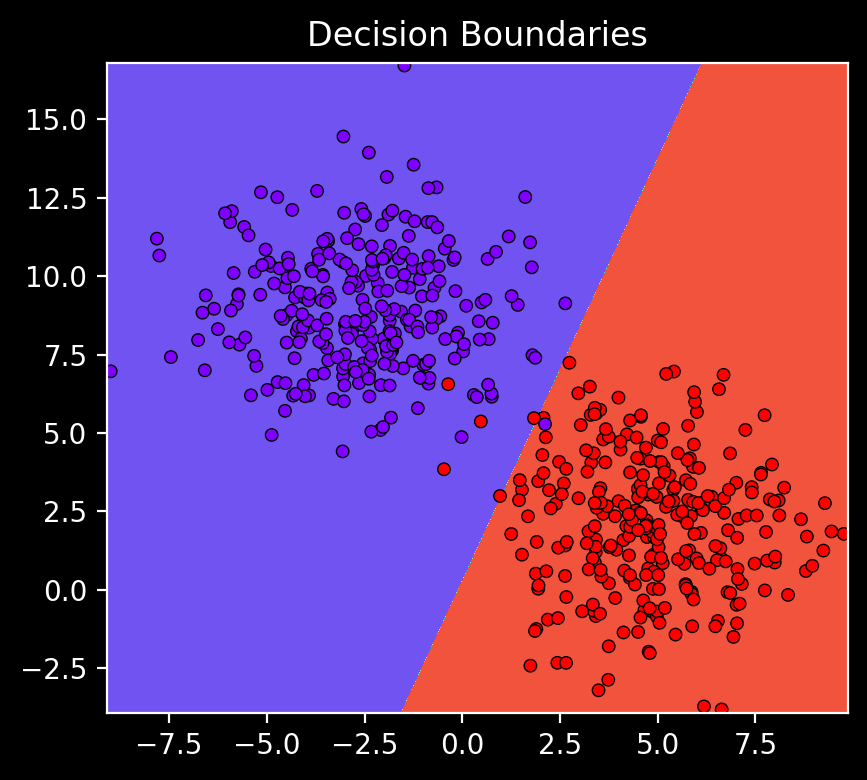

In [97]:
from Plot import plot_model_contours
plot_model_contours(lr, x_train, y_train, trained=True)